### DSTA


#### Chapter I - Food Webs: Solutions

##### This exercise notebook is taken from the (Python 2) notebook for Ch. 1 of Caldarelli-Cheesa's textbook (CC).

Please also see the [online NetworkX manuals](https://networkx.org/documentation/stable/index.html).


#### Getting Started

In [65]:
# check the running Python version
import sys
print(sys.version)

3.12.3 (tags/v3.12.3:f6650f9, Apr  9 2024, 14:05:25) [MSC v.1938 64 bit (AMD64)]


## Import packages

In [66]:
# import the required modules

import numpy as np
import matplotlib.pyplot as plt

# this my require installation
import networkx as nx

#### Instantiate a simple Adjacency Matrix

In [67]:
adjacency_matrix=[
                  [0,1,0,1],
                  [1,0,1,1],
                  [0,1,0,0],
                  [1,1,0,0]
                  ]

###  Q1. Draw an undirected graph from an adjacency matrix

In [68]:
A = np.array(adjacency_matrix)

G = nx.from_numpy_array(A)


In [69]:
# inspect the new data structure

type(G)

networkx.classes.graph.Graph

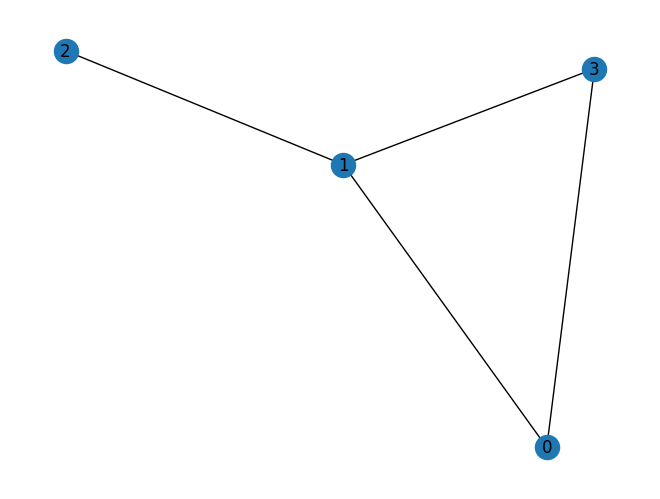

In [70]:
nx.draw(G, with_labels=True)

### Browsing the rows

In [71]:
for row in adjacency_matrix:
    print(row)

[0, 1, 0, 1]
[1, 0, 1, 1]
[0, 1, 0, 0]
[1, 1, 0, 0]


### Browsing the link information

In [72]:
for row in adjacency_matrix:
    for a_ij in row:
        print(a_ij, end=" ")
        
    print("\r")

0 1 0 1 
1 0 1 1 
0 1 0 0 
1 1 0 0 


##  Q2. Draw the directed graph from an adjacency matrix

In [73]:
"""
With directed networks, the adjacency matrix is not symmetric, like for Food Web
So, if a non-zero element is present in row 2, column 3, this means there is an 
arc (directed edge) from node 2 toward node 3
"""

adjacency_matrix_directed = [
    [0,1,0,1],
    [0,0,1,0],
    [0,0,0,1],
    [0,0,0,0]
    ]

AD = np.array(adjacency_matrix_directed)

GR = nx.from_numpy_array(AD, create_using=nx.MultiDiGraph())

In [74]:
type(GR)


networkx.classes.multidigraph.MultiDiGraph

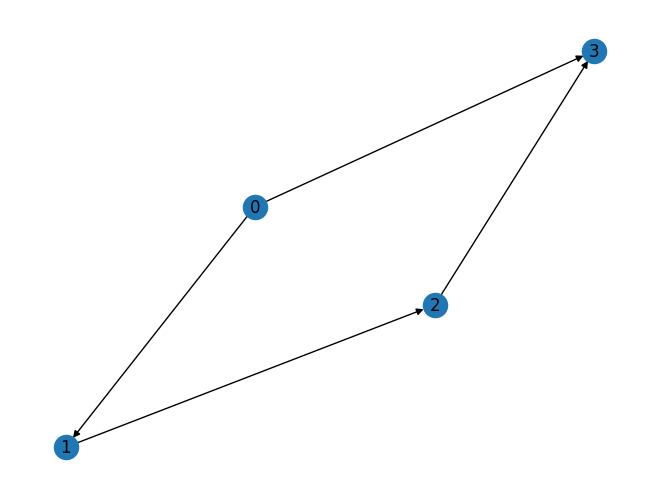

In [75]:
nx.draw(GR, with_labels=True)

In [76]:
for edge in GR.out_edges(2):
    print(edge)

(2, 3)


## Basic Statistics

In [77]:
# The number of species is the number of rows or columns of 
# the adjacency matrix
num_species = len(adjacency_matrix_directed[0])

# The number of links or predations is the non zero elements 
# of the adjacency matrix (this holds for directed graphs)
num_predations = 0
for i in range(num_species):
    for j in range(num_species):
        if adjacency_matrix_directed[i][j] != 0:
            num_predations = num_predations + 1

# To check if a species is a Basal (B), an Intermediate (I) or
# a Top (T) one  we have to check the presence of 1s both in 
# the row and in the column of each species
row_count = [0,0,0,0]
column_count = [0,0,0,0]

for i in range(num_species):
    for j in range(num_species):
        row_count[i] += adjacency_matrix_directed[i][j]
        column_count[j] += adjacency_matrix_directed[i][j]

number_B = 0
number_I = 0
number_T = 0

# TODO: T, B switch
for n in range(num_species):
    if row_count[n] == 0:
        number_T += 1
        continue
    if column_count[n] == 0:
        number_B += 1
        continue
    else:
        number_I += 1
   
print("number of species", num_species)
print("number of predations", num_predations)
print("classes Basal, Top, Intermediate: ", number_B, number_T, number_I)
print("connectance", float(num_predations) / float(num_species ** 2))

number of species 4
number of predations 4
classes Basal, Top, Intermediate:  1 1 2
connectance 0.25


In [78]:
np.array(adjacency_matrix_directed)

array([[0, 1, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0]])

In [79]:
print(row_count, column_count)

[2, 1, 1, 0] [0, 1, 1, 2]


## The Degree

In [80]:
# For the undirected network
degree_node_1 = 0

for j in adjacency_matrix[1]:
    degree_node_1 += j
print ("degree of node 1:",degree_node_1)

# For the directed case we already calculated the sum over 
# the rows and columns for the adjacency_matrix_directed
out_degree_node_2 = row_count[2]
in_degree_node_3 = column_count[3]

print( "out_degree node 2:", out_degree_node_2)
print ("in_degree node 3:", in_degree_node_3)

degree of node 1: 3
out_degree node 2: 1
in_degree node 3: 2


##  Q3. Draw the histogram of degree distribution from adjacency matrix

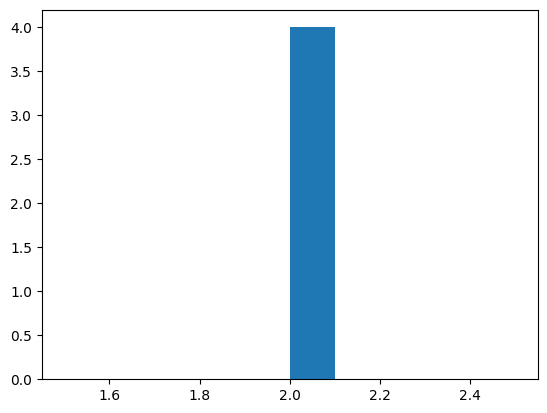

In [81]:
def plot_degree_dist(graph):
    """ 
    :param graph: A directed or undirected graph

    Creates a frequency bar plot with the degree of
    the nodes within the graph
    """
    # print(G.nodes())
    degrees = [graph.degree(n) for n in graph.nodes()]
    
    # print(degrees)
    plt.hist(degrees)
    plt.show()

plot_degree_dist(GR)
# plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

## Degree in Networkx

In [82]:
# Generate an empty graph
GE = nx.Graph()

# define the nodes
GE.add_node(1)
GE.add_node(2)
GE.add_node(3)
GE.add_node(4)

# link the nodes
GE.add_edge(1,2)
GE.add_edge(1,4)
GE.add_edge(2,3)
GE.add_edge(2,4)

# degree of the node 2
print(GE.degree(2))

3


##  Q4. Draw the graph and degree distribution histogram for the above. 

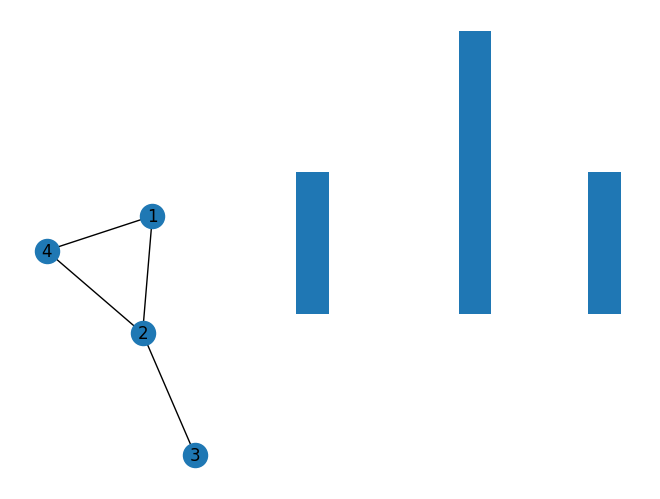

In [83]:
nx.draw(GE, with_labels=True)
plot_degree_dist(GE)

## Clustering Coefficient (Local Version for a single Node) for an Undirected Graph

Details on Clustering Coefficient for Graphs [here](https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/) and [here](https://en.wikipedia.org/wiki/Clustering_coefficient)

In [84]:
adjacency_matrix[1]

[1, 0, 1, 1]

In [85]:
row = 1 # Stands for node 1 (count starts from 0)
node_index_count = 0
node_index_list = []

# Get nodes connected to node 1
for a_ij in adjacency_matrix[row]:
    if a_ij == 1:
        node_index_list.append(node_index_count)
    node_index_count += 1    
    
print("\r")
print(node_index_list)

# We check whether all possible neighbouring couples are linked
neighb_conn = 0

for n1 in node_index_list:
    for n2 in node_index_list:
        if adjacency_matrix[n1][n2] == 1:
            neighb_conn = neighb_conn + 1
   
# we have indeed counted them twice...
neighb_conn = neighb_conn / 2.0
print(neighb_conn)

# Finally the clustering coefficient for node '1' is given by the expression:
clustering_coefficient = neighb_conn / (degree_node_1 * (degree_node_1 - 1) / 2.0) 

print(clustering_coefficient)


[0, 2, 3]
1.0
0.3333333333333333


### Check calculation with networkx method

In [86]:
all_clustering_coefficients = nx.clustering(G)
print(f"All Clustering Coefficients: {all_clustering_coefficients}")
print(f"Node 1 Clustering Coefficient: {all_clustering_coefficients[1]}")

All Clustering Coefficients: {0: 1.0, 1: 0.3333333333333333, 2: 0, 3: 1.0}
Node 1 Clustering Coefficient: 0.3333333333333333


#### Compute distance with Breadth-first Search

A quick introduction to Breadth-First Search (BFS) can be found on [Geeksforgeeks](https://www.geeksforgeeks.org/breadth-first-search-or-bfs-for-a-graph/) and [Wikipedia](https://en.wikipedia.org/wiki/Breadth-first_search).

#### Create the undirected graph

('B', 'C') 




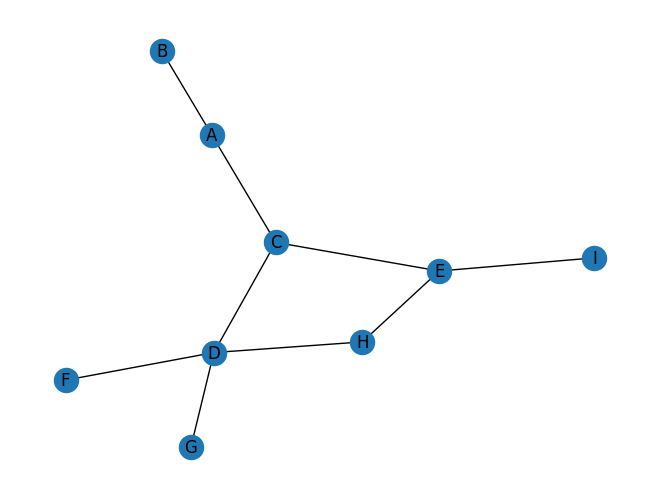

In [87]:
GU = nx.Graph()

GU.add_edges_from([
    ('A','B'),
    ('A','C'),
    ('C','D'),
    ('C','E'),
    ('D','F'),
    ('D','H'),
    ('D','G'),
    ('E','H'),
    ('E','I')
    ])

# Example of printing neighbors of a node 'A'
print(tuple(GU.neighbors('A')), "\n\n")

nx.draw(GU, with_labels=True)

In [88]:
# Each graph node has an empty dictionary
print(GU.nodes["C"])
list(GU.neighbors("C"))

{}


['A', 'D', 'E']

### Using the first node as root, find the distance of every single node from the root.

In [89]:
root_node = 'A'

queue = []
queue.append('A')

# Distance of root node vs itself
GU.nodes['A']["distance"] = 0

while len(queue):
    working_node = queue.pop(0)

    # Uncomment the following 2 lines to print more output
    # print(f"Working Node: {working_node}")
    # print(f"{working_node} Neighbors: {list(GU.neighbors(working_node))}")

    # Iterate through current node neighbors
    for n in GU.neighbors(working_node):
        if len(GU.nodes[n]) == 0:  # Checks if a distance has been assigned
            GU.nodes[n]["distance"] = GU.nodes[working_node]["distance"] + 1
            queue.append(n)
            
for n in GU.nodes():
    print (n, GU.nodes[n]["distance"])
    

A 0
B 1
C 1
D 2
E 2
F 3
H 3
G 3
I 3


In [90]:
GU.nodes["B"]

{'distance': 1}

## Reading files with Food Web data

In [91]:
# This is one of the wet areas presented in Ch. 1
FILE = "./data/Little_Rock_Lake.txt"

In [92]:
DG = nx.DiGraph()

input_file = open(FILE,'r')
while True:
    next_line = input_file.readline()
    if not next_line:
        break

    next_line_fields = next_line[:-2].split(' ')
    node_a = next_line_fields[1] # There's a space in the beginning of each edge
    node_b = next_line_fields[2]

    print(node_a, node_b)
    DG.add_edge(node_a, node_b)

0 1
0 6
0 8
0 12
0 12
0 12
0 12
0 12
0 12
0 12
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 13
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 14
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 15
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 16
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 17
0 18
0 18
0 18
1 
1 
1 
1 
1 
1 1
1 1
2 
2 11
3 
3 
3 
3 
3 
3 1
3 1
3 11
4 
4 11
5 
5 
5 
5 
5 
5 1
5 1
5 11
6 
6 11
7 
7 
7 
7 
7 
7 1
7 1
7 11
8 
8 11
9 
9 
9 
9 
9 
9 11
10 
10 
10 
10 
10 
11 
11 
11 
11 
11 1
12 
12 
12 
12 
12 
12 
12 1
12 1
12 1
12 1
12 1
12 2
12 2
12 3
12 4
12 7
13 
13 
13 
13 
13 
13 1
13 1
13 1
13 1
13 2
13 2
13 4
13 7
14 
14 
14 
14 
14 
14 
14 1
14 1
14 1
14 1
14 2
14 2
14 4
14 7
15 
15 
15 
15 
15 
15 
15 1
15 1
15 1
15 1
15 1
15 2
15 2
15 4
15 7
16 
16 
16 
16 
16 
16 
16 
16 
16 1
16 1
16 2
16 2
16 7
17 
17 
17 
17 
17 
17 
17 1
17 1
17 1
17 1
17 1
17 2
17 2
17 3
17 4
17 6
17 7
18 
18 
18 
18 
18 
18 1
18 1
18 1
18 1
18 1
18 2
18 2
18 3
18 4
18 6
18 7
19 
19 
19

###  Q5. Draw the graph and degree distribution histogram for the above. 

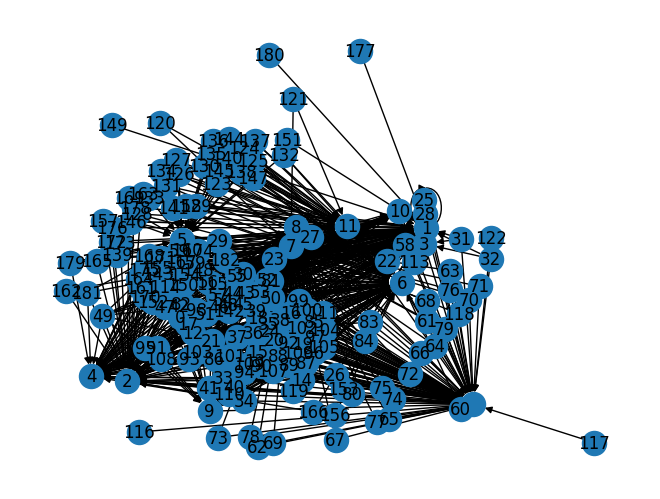

In [93]:
nx.draw(DG, with_labels=True)

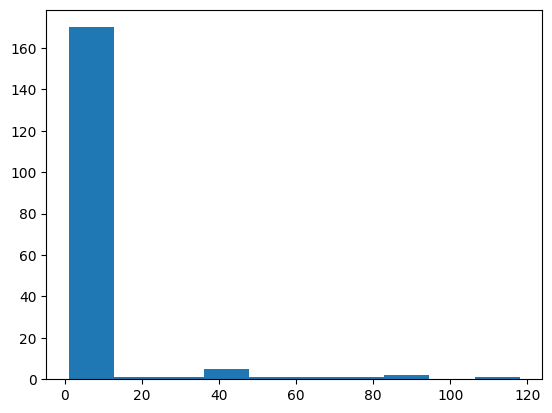

In [94]:
plot_degree_dist(DG)

## Trophic Species

## Defining the trophic pattern key
this is a way to generate a unique key starting from the ordered lists of preys and predators attached to nodes

In [95]:
def get_node_key(node: int) -> list:
    """
    :param node: Integer that represents a node in a directed graph.

    :return out_list: Sorted list with destination nodes of outgoing
    and incoming edges.
    """
    # Collect destinations of outgoing edges in a list
    out_list = []
    for out_edge in DG.out_edges(node):
        out_list.append(out_edge[1])
    
    # Collect destinations of incoming edges in a list
    in_list = []
    for in_edge in DG.in_edges(node):
        in_list.append(in_edge[0])
    
    out_list.sort()
    out_list.append('-')
    in_list.sort()
    out_list.extend(in_list)
    
    return out_list

## Grouping the Trophic Species and Regenerating the Trophic network

In [96]:
def TrophicNetwork(DG: nx.DiGraph) -> nx.DiGraph:
    """
    :param DG: A directed graph

    :return DG: A directed graph
    """
    trophic = {}
    
    # Create dictionary with node keys: 
    # Each key is created by get_node_key function, key value is the node 
    for n in DG.nodes():
        k = tuple(get_node_key(n))
        if not k in trophic:
            trophic[k] = []

        trophic[k].append(n)

    # TODO: Ask what this loop does
    # Loop through all keys and removed redundant nodes
    for species in trophic.keys():
        if len(trophic[species]) > 1:
            for n in trophic[species][1:]:
                DG.remove_node(n)
    return DG

# deleting the environment
# DG.remove_node('0')

TrophicDG = TrophicNetwork(DG)
print("S:", TrophicDG.number_of_nodes())
print("L:", TrophicDG.number_of_edges())
print("L/S:", float(TrophicDG.number_of_edges()) / TrophicDG.number_of_nodes())

S: 50
L: 201
L/S: 4.02


## Classes in Food Webs

In [97]:
def compute_classes(DG: nx.DiGraph) -> tuple:
    """
    :param DG: A directed graph

    :return: A tuple of lists, where each list represents
    a species class:
    Basal, Intermediate or Top
    """
    basal_species = []
    top_species = []
    intermediate_species = []

    # TODO: basal_species list swapped with top_species list
    for n in DG.nodes():
        if DG.in_degree(n) == 0:
            basal_species.append(n)
        elif DG.out_degree(n) == 0:
            top_species.append(n)
        else:
            intermediate_species.append(n)
            
    return basal_species, intermediate_species, top_species

B, I, T = compute_classes(TrophicDG)
n_classes = len(B) + len(T) + len(I)

print(f"Total Number of Species: {n_classes}")
print(f"Basal: {len(B)}")
print(f"Top: {len(T)}")
print(f"Intermediate: {len(I)}")

print ("Percentage of B:", float(len(B)) / (n_classes))
print ("Percentage of I:", float(len(I)) / (n_classes))
print ("Percentage of T:", float(len(T)) / (n_classes))

Total Number of Species: 50
Basal: 34
Top: 1
Intermediate: 15
Percentage of B: 0.68
Percentage of I: 0.3
Percentage of T: 0.02


## Proportion of links among classes and ratio prey/predators

In [98]:
def InterclassLinkProportion(DG: nx.DiGraph, C1: list, C2: list) -> float:
    """
    :param DG: A directed graph
    :param C1: List of nodes that belong to a class of species
    (Base, Intermediate, Top)
    :param C2: A class of species (Base, Intermediate, Top)

    :return: Proportion of links between pair of classes against the 
    total number of edges
    """
    count = 0
    for n1 in C1:
        for n2 in C2:
            if DG.has_edge(n1, n2):
                count += 1
    
    prop = float(count) / DG.number_of_edges()
    return round(prop, 3)
    
print("links in BT:", InterclassLinkProportion(TrophicDG, B, T))
print("links in BI:", InterclassLinkProportion(TrophicDG, B, I))
print("links in II:", InterclassLinkProportion(TrophicDG, I, I))
print("links in IT:", InterclassLinkProportion(TrophicDG, I, T))

# Ratio prey / predators
print("P/R:", float((len(B) + len(I))) / (len(I) + len(T)))

links in BT: 0.124
links in BI: 0.647
links in II: 0.154
links in IT: 0.075
P/R: 3.0625


In [99]:
# Docstring help demonstration
help(InterclassLinkProportion)

Help on function InterclassLinkProportion in module __main__:

InterclassLinkProportion(DG: networkx.classes.digraph.DiGraph, C1: list, C2: list) -> float
    :param DG: A directed graph
    :param C1: List of nodes that belong to a class of species
    (Base, Intermediate, Top)
    :param C2: A class of species (Base, Intermediate, Top)

    :return: Proportion of links between pair of classes against the
    total number of edges

